# Introduction
According to Newzoo, the mobile gaming industry is expected to top $100 billion by 2021, achieving a decade of double-digit growth. And it generated more than 50 per-cent of the global games market last year.1 How did such a young industry grow so fast? One way was by offering more payment options, some of which don’t even require a purchase.

According to eMarketer, mobile is expected to top TV in terms of daily screen time this year.2 Many of us will spend that time gaming. Those of us who use gaming apps spend an average of 6.5 hours a week on them, and 78 per-cent use them daily.3 Most say they play to “pass the time.”4 That’s where mobile has a clear advantage: Unlike TV, we can take our phones anywhere.

The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as Clash of Clans, Plants vs Zombies and Pokemon GO.

![](https://www.thinkwithgoogle.com/feature/mobile-gaming-genres/static/img/gamers-mmo.fa2a6c5.gif)

# Objective 
To find out what factor make a successful game.

# Ideas
Use the number of ratings as a proxy indicator for the overall success of a game

# Importing Packages and Collecting Data 

In [1]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Special Visualization'''
from wordcloud import WordCloud 
import missingno as msno

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
'''Reading the data from csv files'''
data = pd.read_csv('../input/17k-apple-app-store-strategy-games/appstore_games.csv')
display(data.head(3))
print('Dimension of data:', data.shape)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


Dimension of data: (17007, 18)


In [3]:
'''Droping unwanted variable'''
data.drop(['URL', 'ID'], axis = 1, inplace = True)

In [4]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [5]:
bold('**Variable Description of Data:**')
description(data)

**Variable Description of Data:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Name,object,0,16847,Sudoku,Reversi,Morocco
1,Subtitle,object,11746,5010,NaN,NaN,NaN
2,Icon URL,object,0,16847,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
3,Average User Rating,float64,9446,9,4,3.5,3
4,User Rating Count,float64,9446,1792,3553,284,8376
5,Price,float64,24,24,2.99,1.99,0
6,In-app Purchases,object,9324,3803,NaN,NaN,NaN
7,Description,object,0,16473,"Join over 21,000,000 of our fans and download ...","The classic game of Reversi, also known as Oth...",Play the classic strategy game Othello (also k...
8,Developer,object,0,8693,Mighty Mighty Good Games,Kiss The Machine,Bayou Games
9,Age Rating,object,0,4,4+,4+,4+


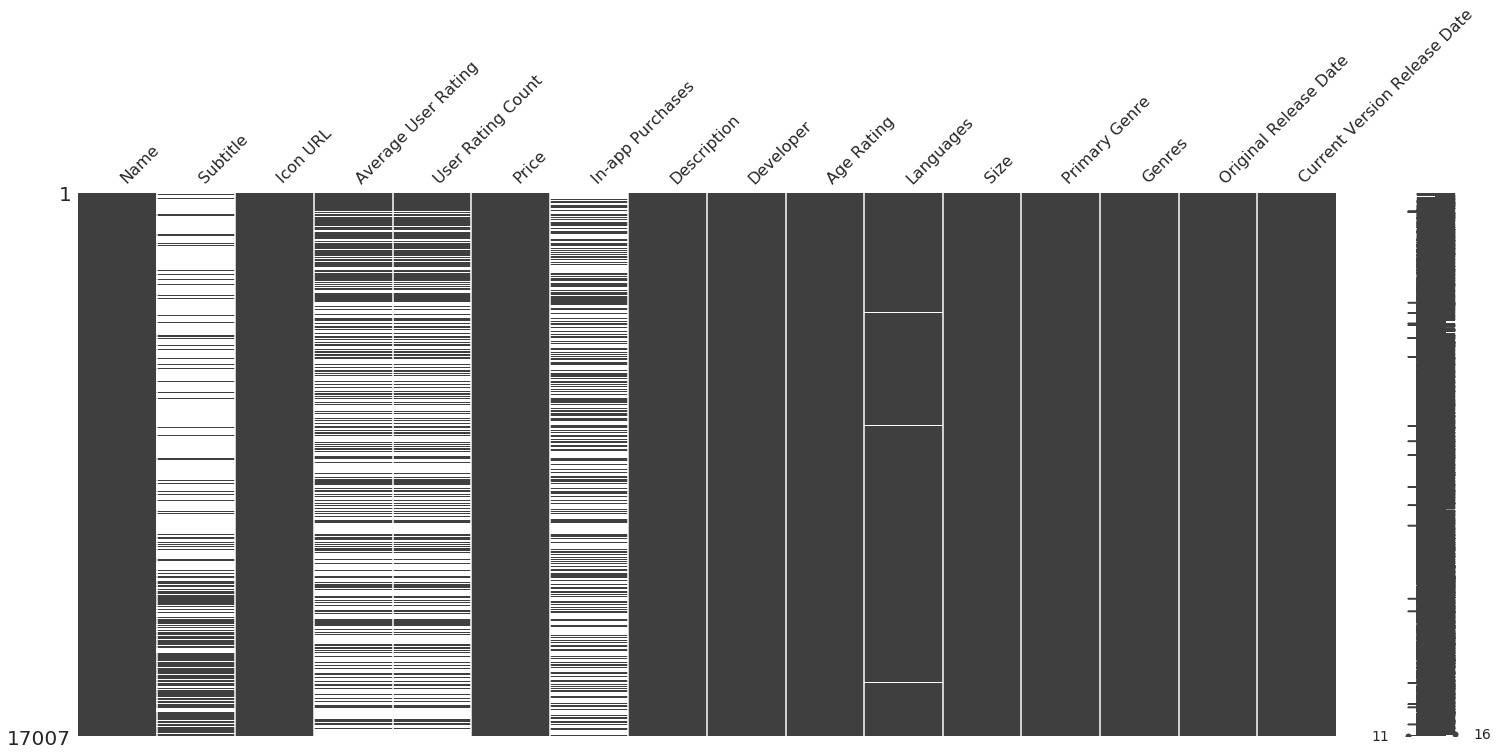

In [6]:
'''Visualization of missing variable'''
msno.matrix(data)
plt.show()

**It is normal most of user never give the rating to app, therefore we have more missing variable in the averge user rating and user rating count.**

# Icon Url 
This data is provided as a URL. In this case, you can get it by crawling. Please check your internet connection.

* single url crawling: 0.5 sec
* total : 17000 * 0.5 = 8500 s = over 2 hour.. OMG
* just testing sample code (100 image)

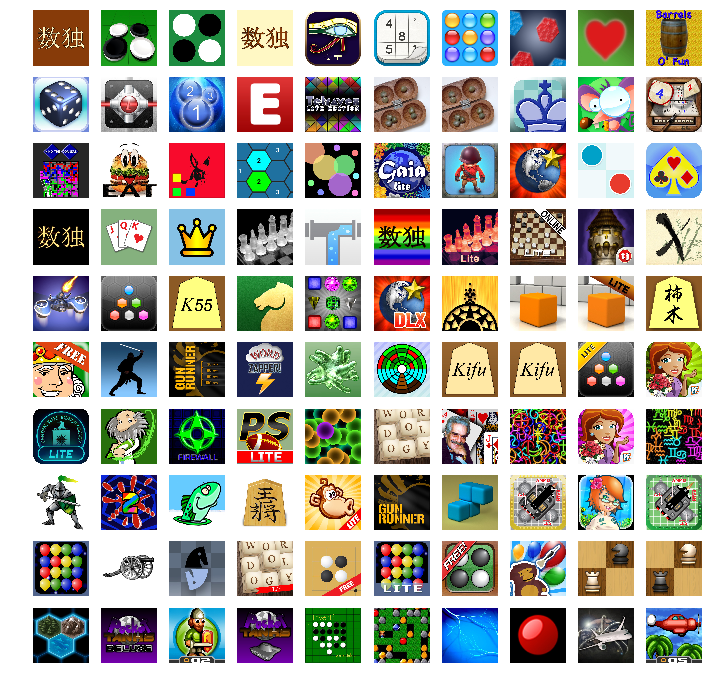

CPU times: user 9.36 s, sys: 232 ms, total: 9.59 s
Wall time: 51.1 s


In [7]:
%%time
import requests
from PIL import Image
from io import BytesIO

fig, ax = plt.subplots(10,10, figsize=(12,12))

for i in range(100):
    r = requests.get(data['Icon URL'][i])
    im = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(im)
    ax[i//10][i%10].axis('off')
plt.show()

# <font color='firebrick'>Exploratory Data Analysis</font>

## 1. Univariate Analysis 
***Univariate analysis separately explores the distribution of each variable in a data set. It looks at the range of values, as well as the central tendency of the values. Univariate data analysis does not look at relationships between various variables (like bivariate and multivariate analysis) rather it summarises each variable on its own.***

***Methods to perform univariate analysis will depend on whether the variable is categorical or numerical. For numerical variable, we would explore its shape of distribution (distribution can either be symmetric or skewed) using histogram and density plots. For categorical variables, we would use bar plots to visualize the absolute.***

## ## <font color='darkgreen'> Average User Rating</font>

**THE MOST FREQUENT RATING IS 4.5 MEASURED**

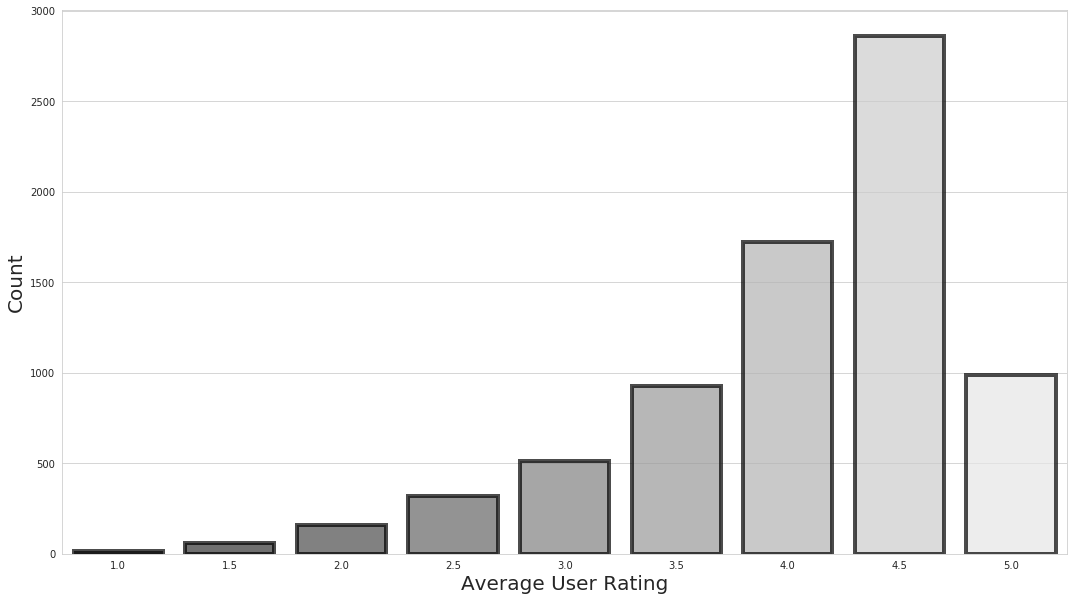

In [8]:
bold('**THE MOST FREQUENT RATING IS 4.5 MEASURED**')
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.countplot(data = data, x ='Average User Rating', palette = 'gray', alpha = 0.7, linewidth=4, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Average User Rating', fontsize = 20)
plt.show()

## ## <font color='darkgreen'>User Rating Count</font>

**USER RATING COUNT IS HIGHLY POSITIVE SKEWED**

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



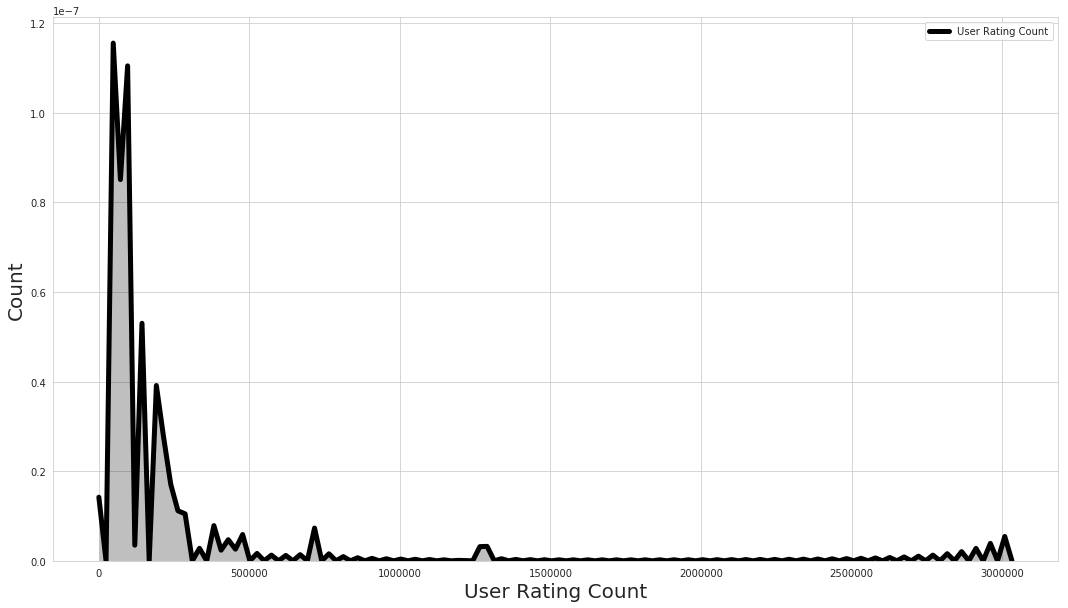

In [9]:
bold('**USER RATING COUNT IS HIGHLY POSITIVE SKEWED**')
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.kdeplot(data['User Rating Count'], shade = True, linewidth = 5, color = 'k')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('User Rating Count', fontsize = 20)
plt.show()

## ## <font color='darkgreen'>Price</font>

**MOST OF THE APPS PRICES BETWEEN 0 TO 10 DOLLARS**

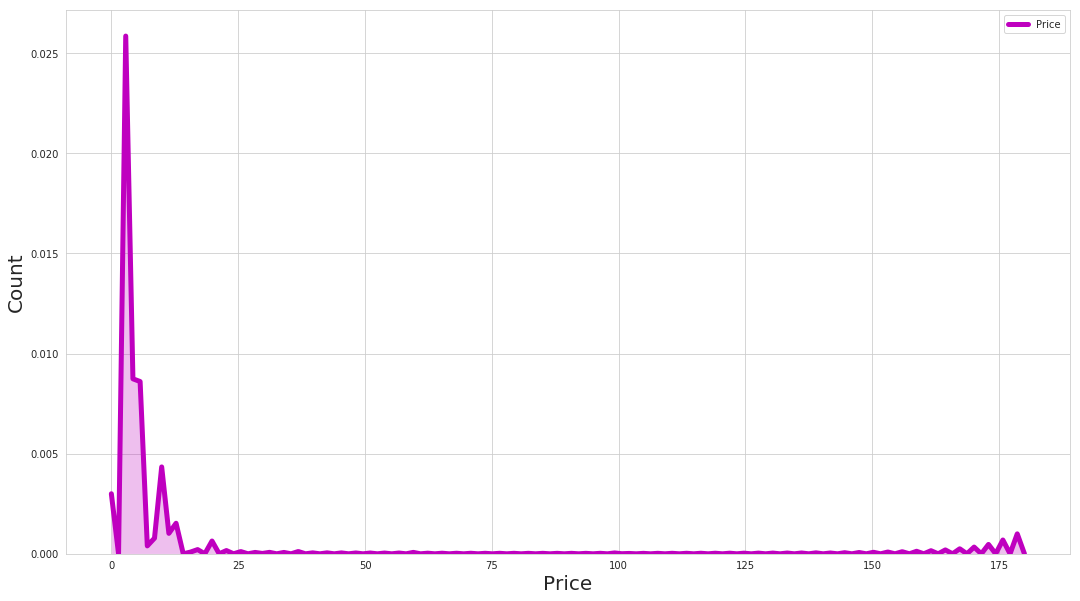

In [10]:
bold('**MOST OF THE APPS PRICES BETWEEN 0 TO 10 DOLLARS**')
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.kdeplot(data['Price'], shade = True, linewidth = 5, color = 'm')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Price', fontsize = 20)
plt.show()

**We can observe that most of the apps are free and some of are high cost between 175 to 200 dollars.**

## ## <font color='darkgreen'>Size</font>

**MOST OF THE APPS HAVE SIZE BETWEEN 0 TO 10 MEGABYTES**

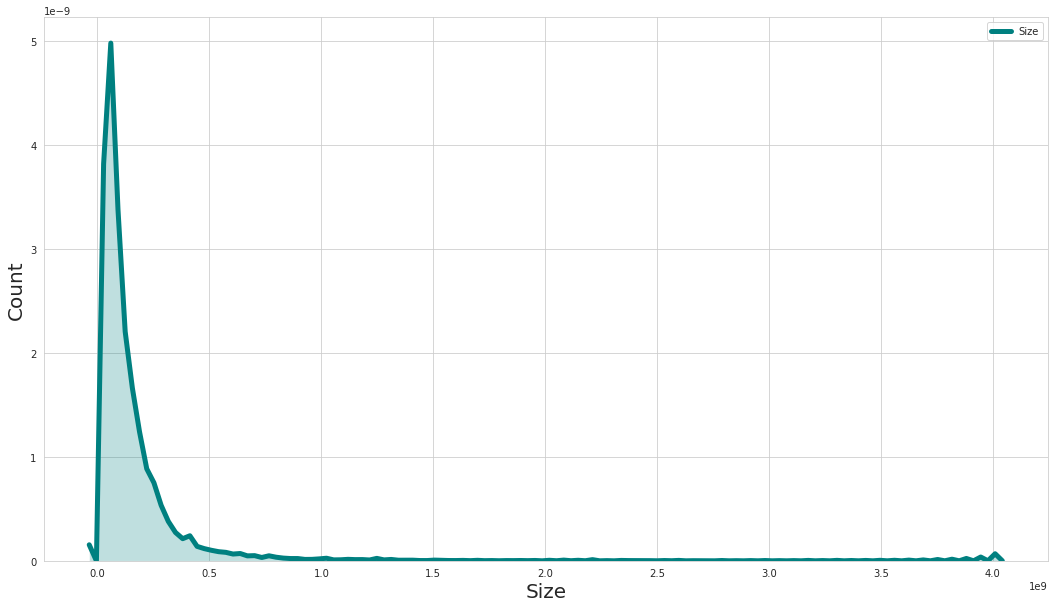

In [11]:
bold('**MOST OF THE APPS HAVE SIZE BETWEEN 0 TO 10 MEGABYTES**')
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.kdeplot(data['Size'], shade = True, linewidth = 5, color = 'teal')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Size', fontsize = 20)
plt.show()

## ## <font color='darkgreen'>Developer</font>

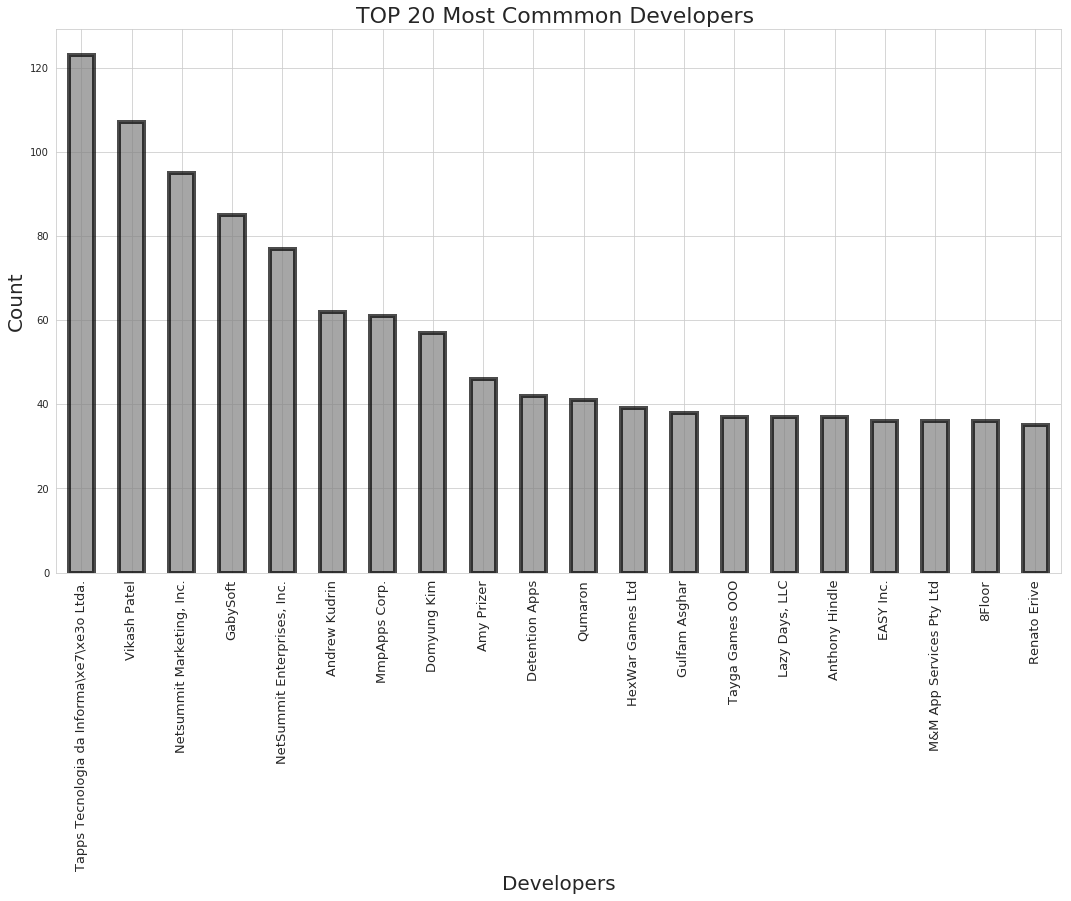

In [12]:
plt.rcParams['figure.figsize'] = (18, 10)
data.Developer.value_counts()[:20].plot(kind='bar',color = 'gray', alpha = 0.7, linewidth=4, edgecolor= 'black')
plt.xlabel("Developers", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("TOP 20 Most Commmon Developers ", fontsize=22)
plt.xticks(rotation=90, fontsize = 13) 
plt.show()

## ## <font color='darkgreen'>Name & Subtitle</font>

**MOST COMMON NAME USED BY GAME DEVELOPERS ARE BATTLE, WAR, PUZZLE**

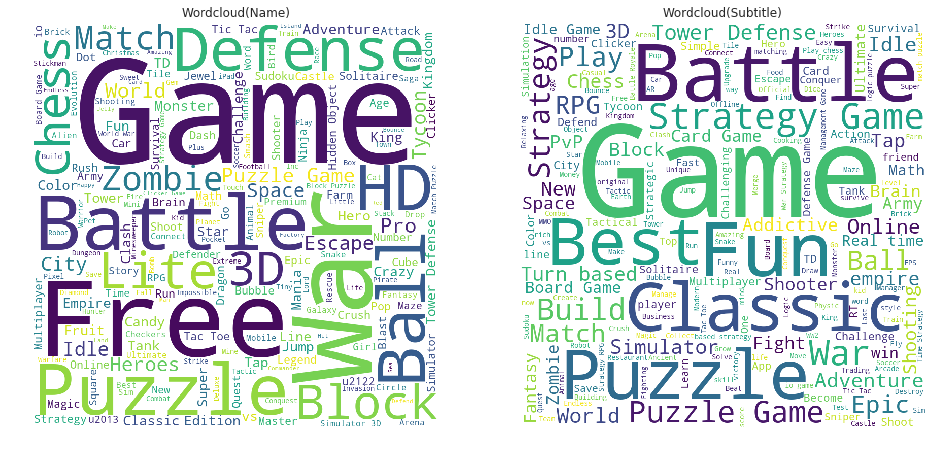

In [13]:
bold('**MOST COMMON NAME USED BY GAME DEVELOPERS ARE BATTLE, WAR, PUZZLE**')
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

## ## <font color='darkgreen'>Age Rating</font>

In [14]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold('**MOST OF THE APPS HAVE 4+ AGE RATING**')
py.iplot([pie_plot(data['Age Rating'].value_counts(), ['cyan', 'gold', 'red'], 'Age Rating')])

**MOST OF THE APPS HAVE 4+ AGE RATING**

## ## <font color='darkgreen'>Popular Genres</font>

**ENTERTAINMENT AND PUZZULE ARE THE MOST POPULAR GAME TPYE IN STRATEGY GAME**

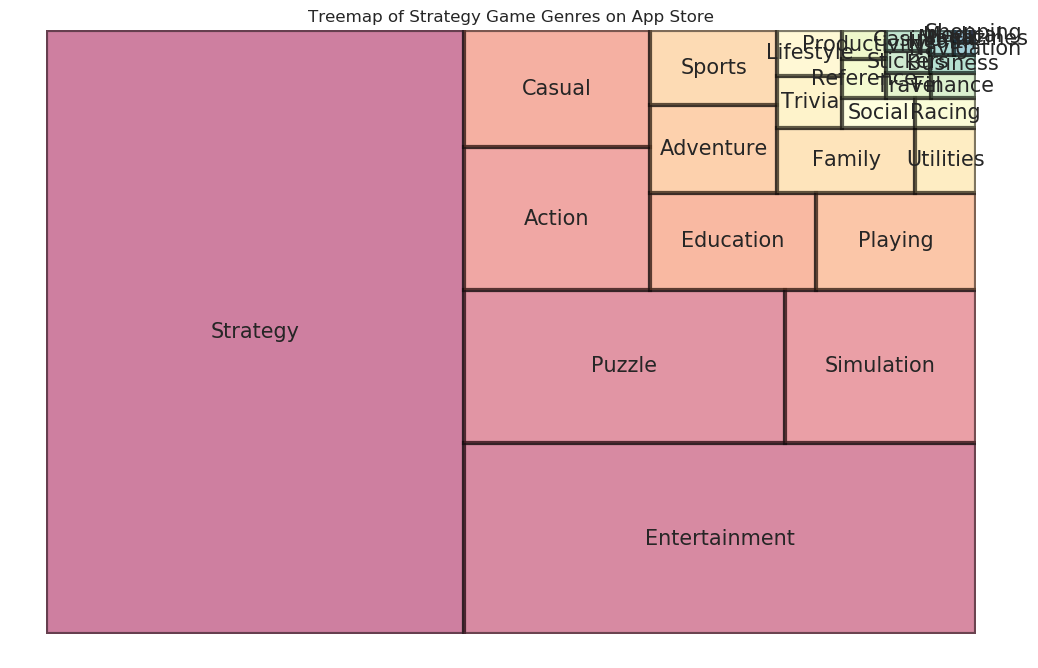

In [15]:
bold('**ENTERTAINMENT AND PUZZULE ARE THE MOST POPULAR GAME TPYE IN STRATEGY GAME**')
import squarify

data['Genreslist'] = data['Genres'].str.extract('([A-Z]\w{5,})', expand=True)
temp_df = data['Genreslist'].value_counts().reset_index()

sizes=np.array(temp_df['Genreslist'])
labels=temp_df['index']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':15})
plt.title('Treemap of Strategy Game Genres on App Store', fontsize = 12)
plt.axis('off')
plt.show()

# 2. Bivariate Analysis 
***Being the most important part, bivariate analysis tries to find the relationship between two variables. We will look for correlation or association between our predictor and target variables. Bivariate analysis is performed for any combination of categorical and numerical variables. The combination can be: Numerical & Numerical, Numerical & Categorical and Categorical & Categorical.***

## ## <font color='darkgreen'>Price vs Averge User Rating</font>

**THERE IS NO RELATIONSHIP BETWEEN PRICE AND AVERGE USER RATING**

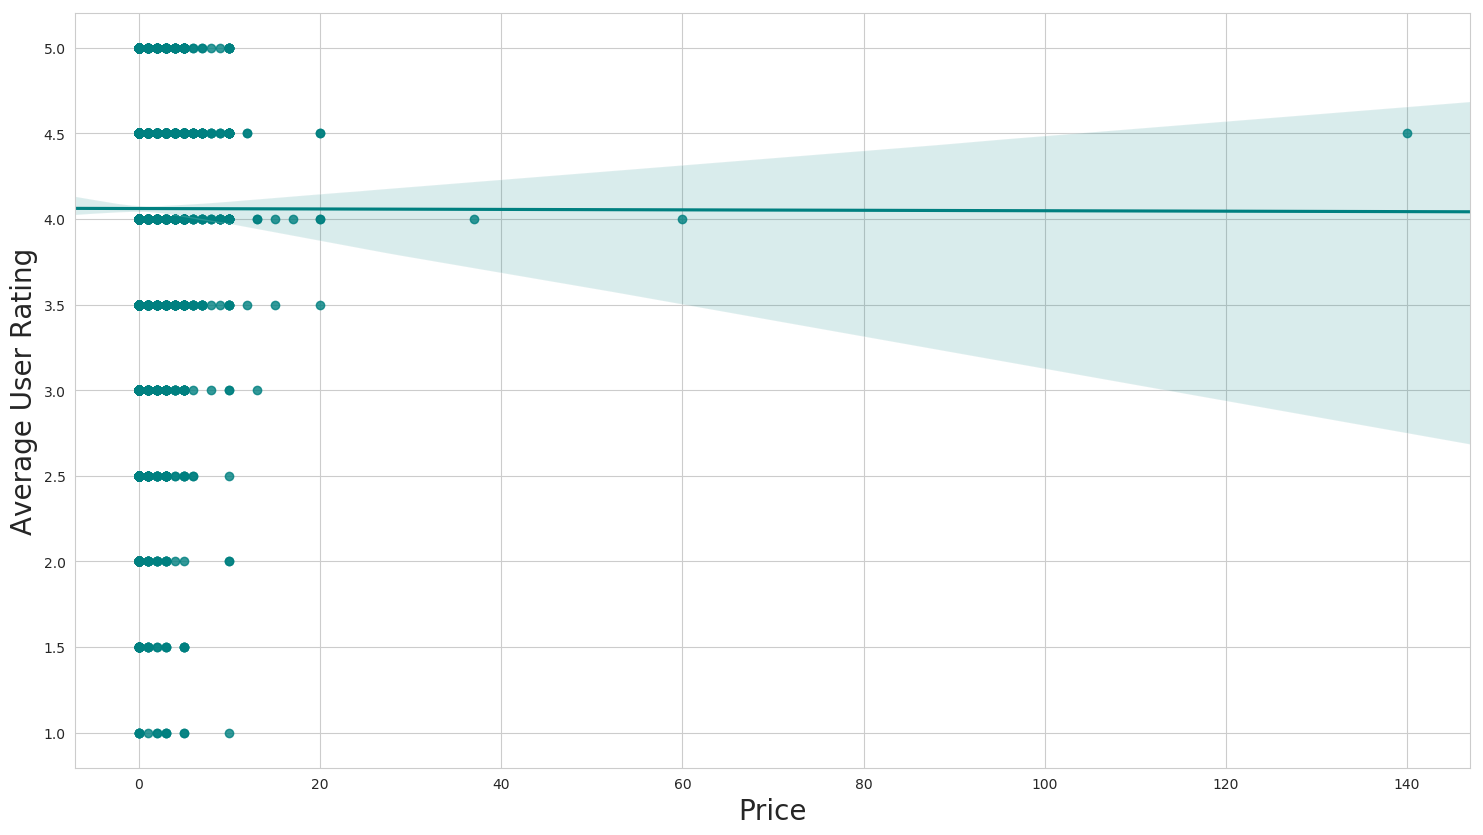

In [16]:
bold('**THERE IS NO RELATIONSHIP BETWEEN PRICE AND AVERGE USER RATING**')
plt.figure(figsize=(18,10), dpi= 100)
ax = sns.regplot(data=data, x='Price', y='Average User Rating', color = 'teal')
ax.set_ylabel('Average User Rating', fontsize = 20)
ax.set_xlabel('Price', fontsize = 20)
plt.show()

**THERE IS LITTLE POSITIVE RELATIONSHIP BETWEEN SIZE AND AVERGE USER RATING**

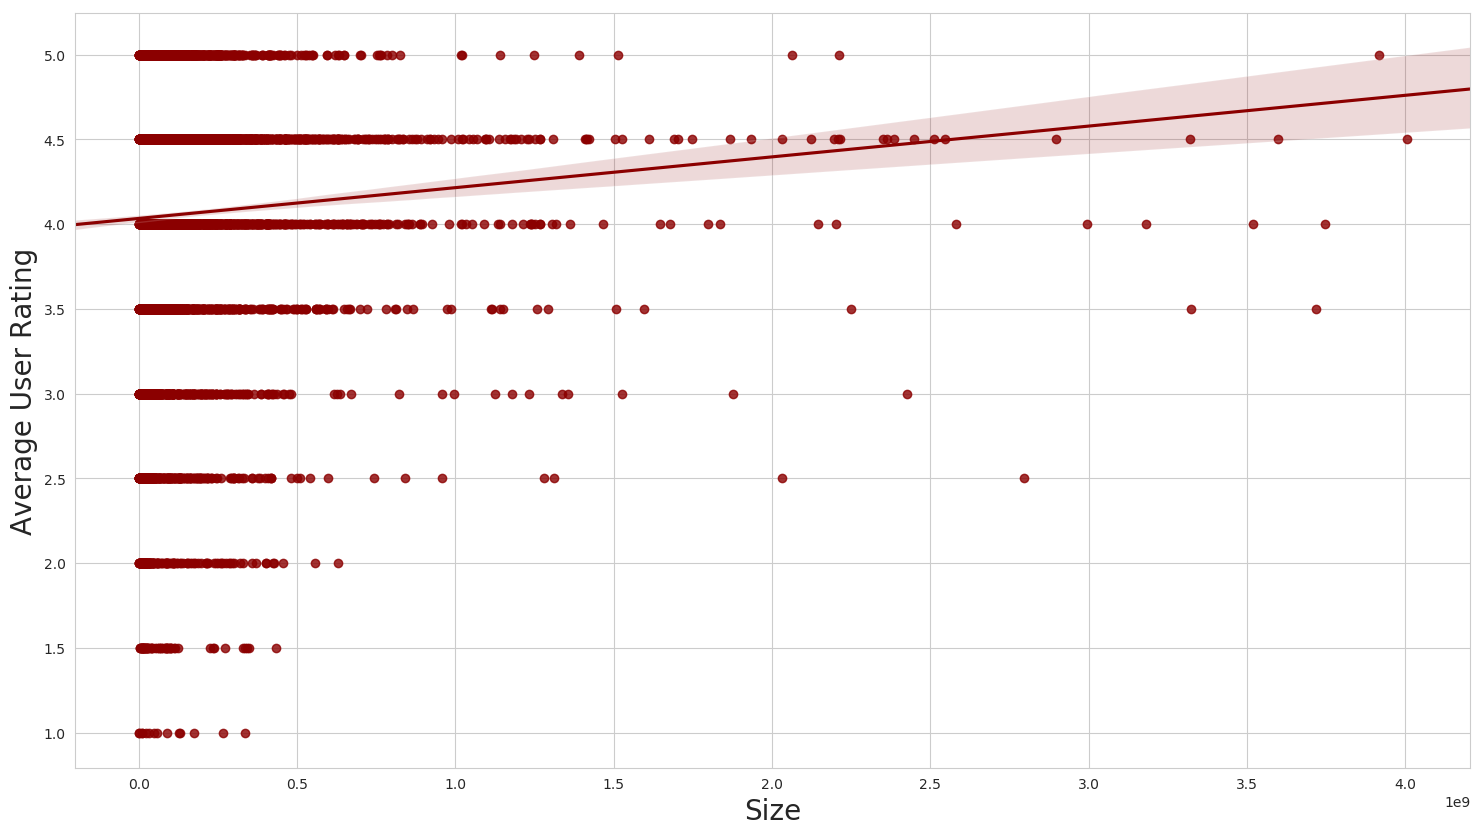

In [17]:
bold('**THERE IS LITTLE POSITIVE RELATIONSHIP BETWEEN SIZE AND AVERGE USER RATING**')
plt.figure(figsize=(18,10), dpi= 100)
ax = sns.regplot(data=data, x='Size', y='Average User Rating', color = 'darkred')
ax.set_ylabel('Average User Rating', fontsize = 20)
ax.set_xlabel('Size', fontsize = 20)
plt.show()

## ## <font color='darkgreen'>Average Rating vs Age Group</font>

**AVERAGE RATING BASED BY AGE GROUP**

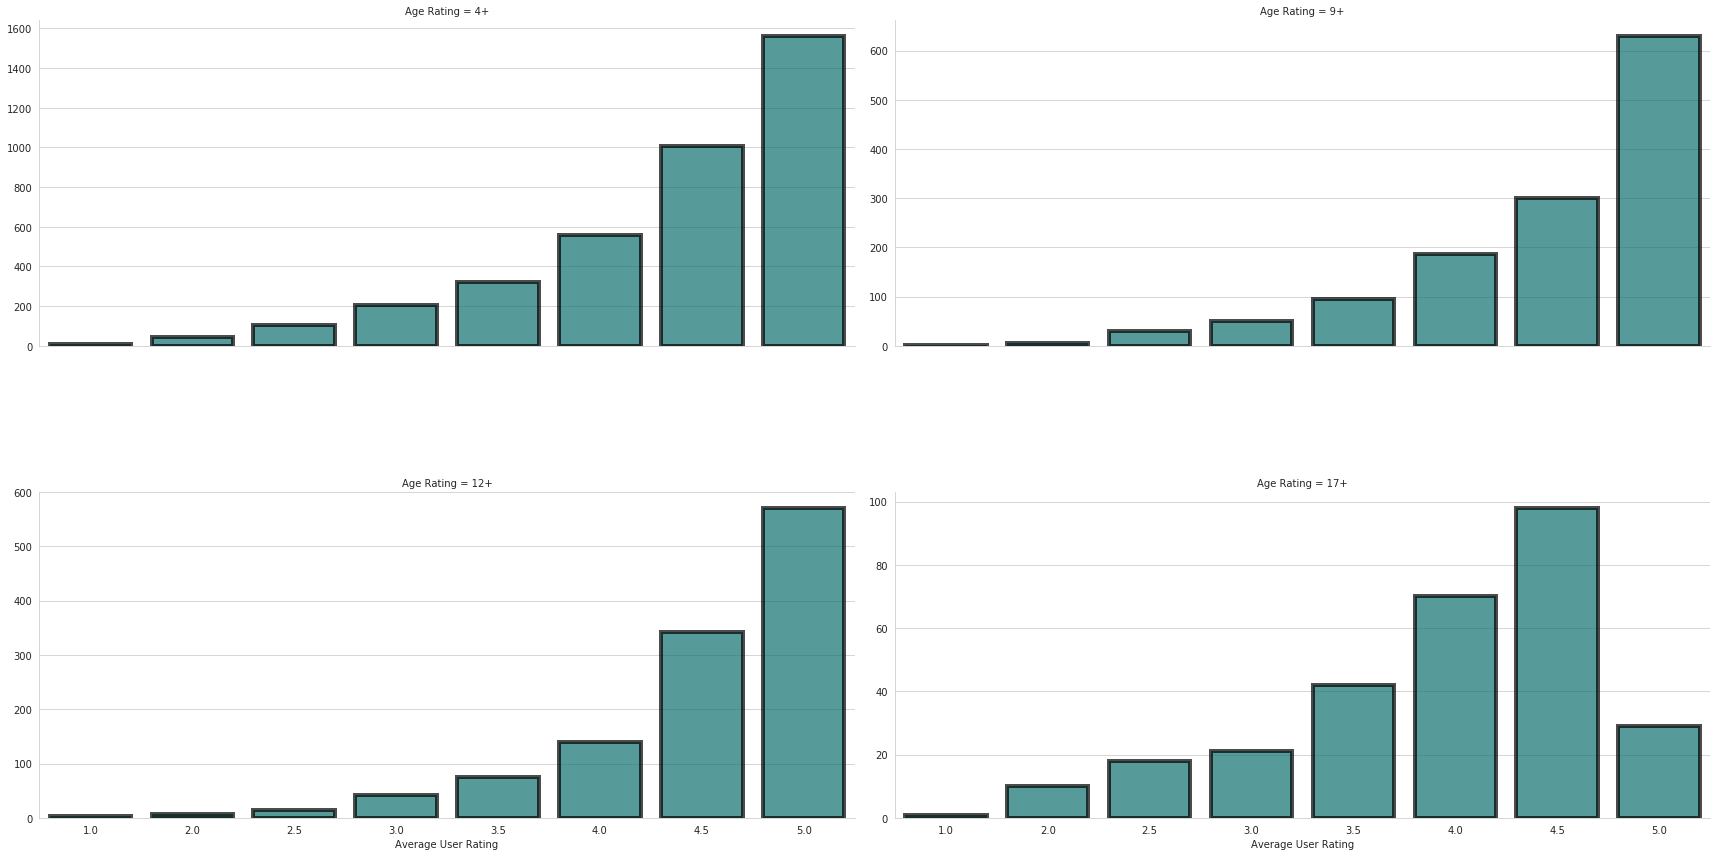

In [18]:
bold('**AVERAGE RATING BASED BY AGE GROUP**')
ax = sns.FacetGrid(data, col="Age Rating", col_wrap=2, height=6, aspect=2,  sharey=False)
ax.map(sns.countplot, 'Average User Rating', color="teal", alpha = 0.7, linewidth=4, edgecolor= 'black')
plt.subplots_adjust(hspace=0.45)
plt.show()

## ## <font color='darkgreen'>Paid Games vs Free Games</font>

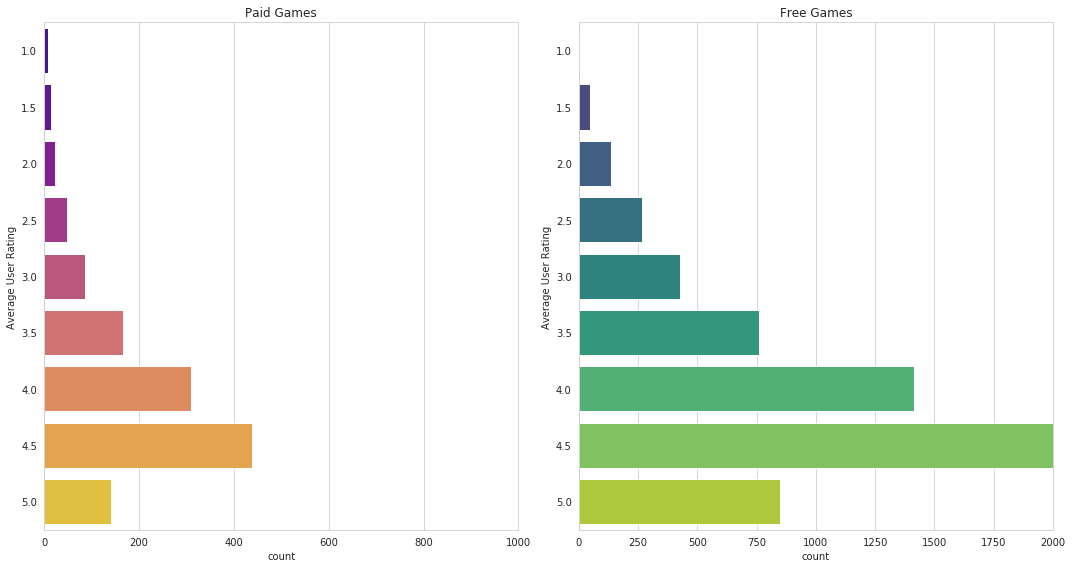

In [19]:
paid = data[data['Price']>0]
free = data[data['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='plasma')
ax[0].set_title('Paid Games')
ax[0].set_xlim([0, 1000])

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='viridis')
ax[1].set_title('Free Games')
ax[1].set_xlim([0,2000])
plt.tight_layout();
plt.show()

* ***As expected free games have more download and rating than paid games.***
* ***Most of the Games are rated quite good around 4.0-5.0***
* ***It doesn't seem like price has an impact on the ratings as both free and paid games have almost same ratings***

## ## <font color='darkgreen'>Date vs App Size</font>

In [20]:
data["Original Release Date"] = pd.to_datetime(data["Original Release Date"])
data["year"] = data["Original Release Date"].dt.year

**SIZE OF THE APPS IS INCREASING OVER TIME**

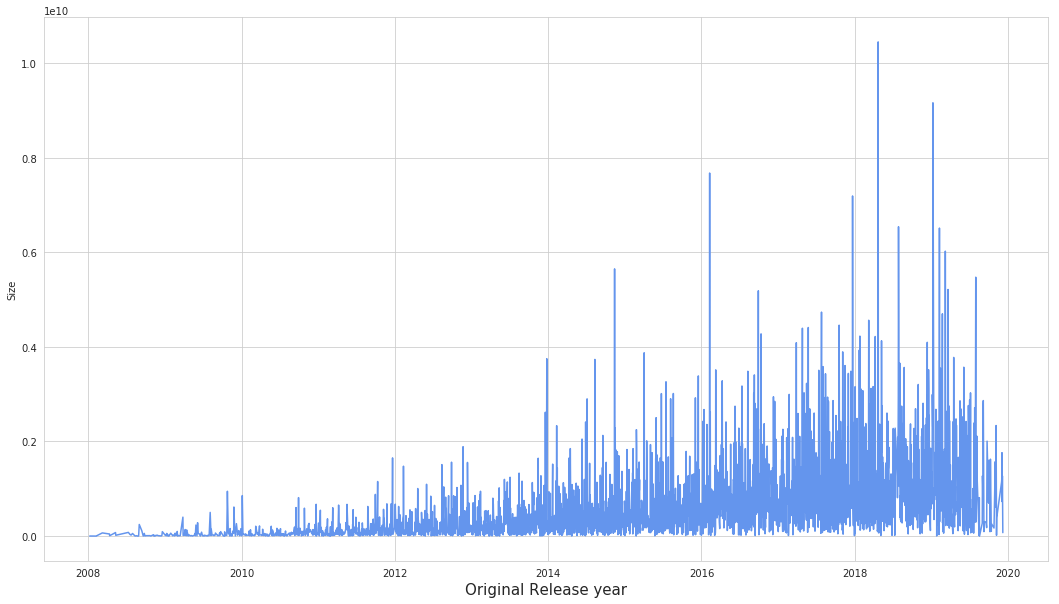

In [21]:
bold('**SIZE OF THE APPS IS INCREASING OVER TIME**')
plt.rcParams['figure.figsize'] = (18,10)
temp_df = data.groupby(['Original Release Date']).Size.sum().reset_index()
ax = sns.lineplot(data = temp_df, x = 'Original Release Date', y = 'Size', color = 'cornflowerblue')
plt.xlabel('Original Release year', fontsize = 15)
plt.ylabel('Size')
plt.show()

## ## <font color='darkgreen'>User Rating Count vs Current Version Release Date</font>

In [22]:
data["Current Version Release Date"] = pd.to_datetime(data["Current Version Release Date"])
data["month"] = data["Current Version Release Date"].dt.month_name() 

**MOST GAMES HAVE BEEN UPDATED IN JULY**

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning:

invalid value encountered in log1p



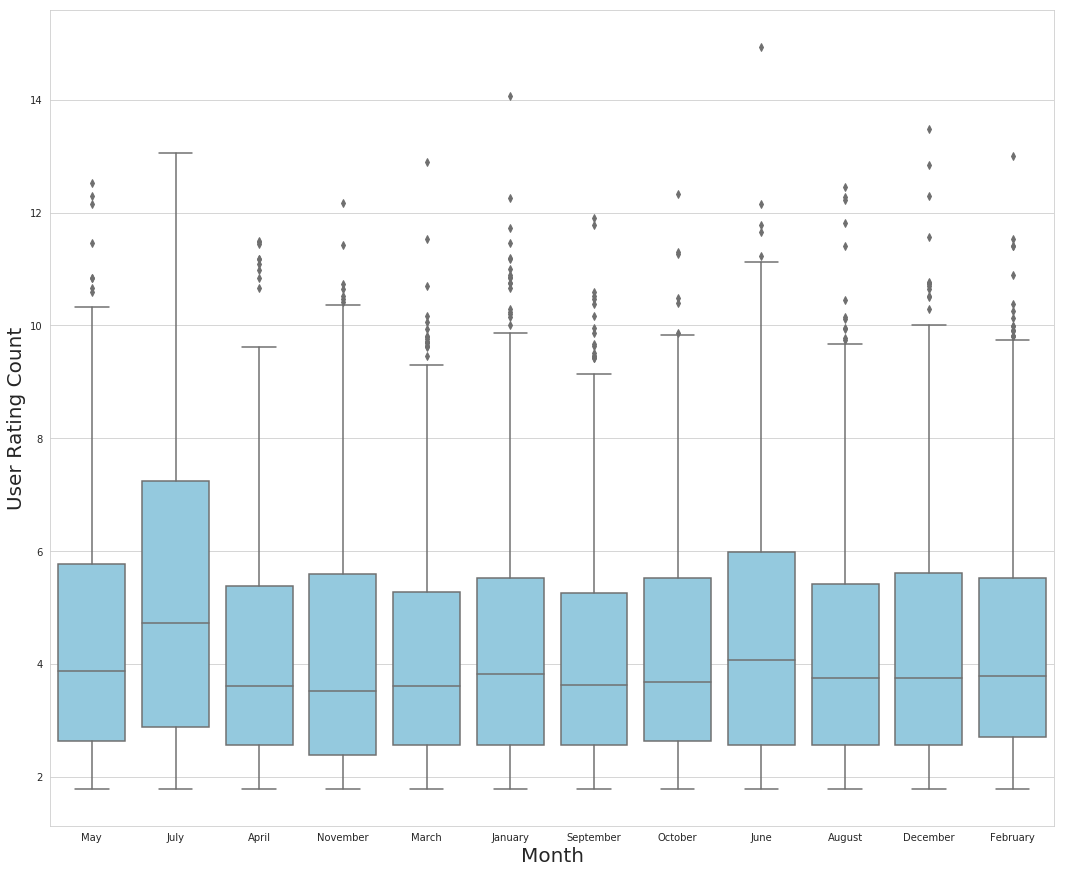

In [23]:
bold('**MOST GAMES HAVE BEEN UPDATED IN JULY**')
plt.rcParams['figure.figsize'] = (18, 15)
ax = sns.boxplot(data = data, x ='month', y = np.log1p(data['User Rating Count']), color = 'skyblue')
ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('User Rating Count', fontsize = 20)
plt.show()

![](https://miro.medium.com/max/600/1*hL_NaHfGU3udOdWU2dRCFg.gif)

## ## <font color='darkgreen'>Heatmap (Correlation)</font>

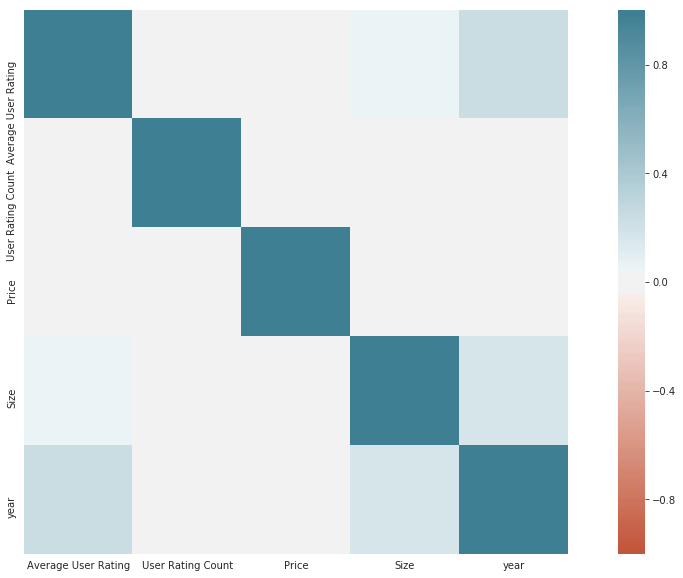

In [24]:
plt.rcParams['figure.figsize'] = (18,10)
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(20, 220, n=200))
plt.show()

## ## <font color='darkgreen'>Networkx (Correlation)</font>
Source:
* [Visualising stocks correlations with Networkx](https://towardsdatascience.com/visualising-stocks-correlations-with-networkx-88f2ee25362e)
* [I. Road to Viz Expert - Unusual tools](https://www.kaggle.com/subinium/road-to-viz-expert-1-unusual-tools)

In [25]:
data['GenreList'] = data['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
data['GenreList'].head()

0              [Strategy, Puzzle]
1               [Strategy, Board]
2               [Board, Strategy]
3              [Strategy, Puzzle]
4    [Strategy, Board, Education]
Name: GenreList, dtype: object

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

test = data['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

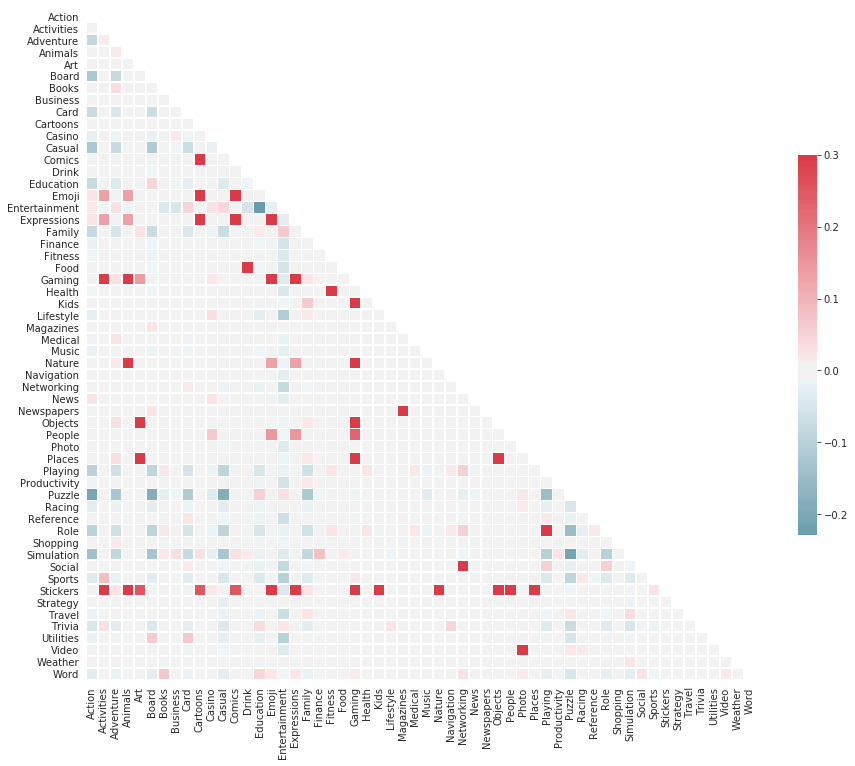

In [27]:
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

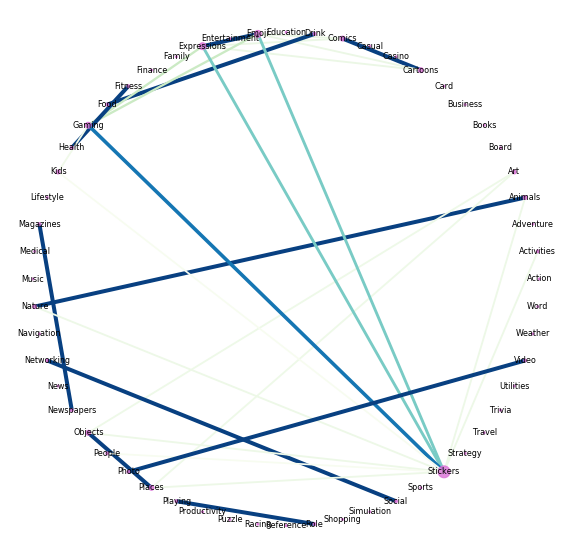

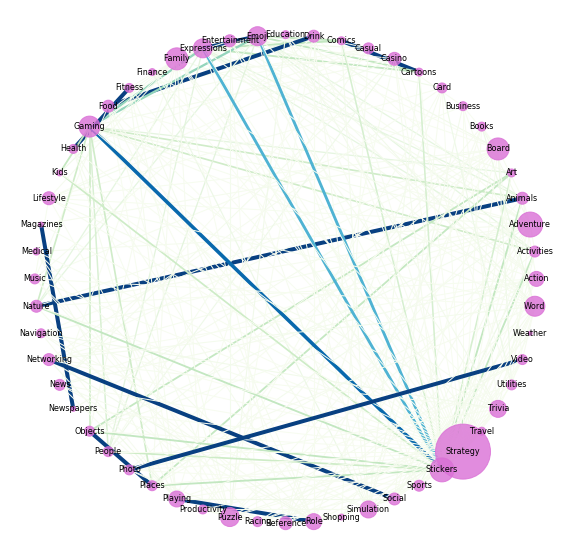

In [28]:
import networkx as nx

stocks = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)

def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)

    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.3)
create_corr_network(G, 'positive', -0.3)

## ## <font color='chocolate'>Most Reviewed & Popular Game</font>

In [29]:
review = data.sort_values(by='User Rating Count', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'User Rating Count', 'Icon URL']].head(10)
review.iloc[:, 0:-1]

,Name,Price,Average User Rating,Size,User Rating Count
1378,Clash of Clans,0.0,4.5,1.612196e+08,3032734.0
7187,Clash Royale,0.0,4.5,1.451080e+08,1277095.0
13414,PUBG MOBILE,0.0,4.5,2.384082e+09,711409.0
1921,Plants vs. Zombies\u2122 2,0.0,4.5,1.207634e+08,469562.0
8139,Pok\xe9mon GO,0.0,3.5,2.815212e+08,439776.0
2410,Boom Beach,0.0,4.5,2.027858e+08,400787.0
12473,"Cash, Inc. Fame & Fortune Game",0.0,5.0,2.459576e+08,374772.0
8632,Idle Miner Tycoon: Cash Empire,0.0,4.5,4.439747e+08,283035.0
38,TapDefense,0.0,3.5,7.774384e+06,273687.0
3550,Star Wars\u2122: Commander,0.0,4.5,1.230838e+08,259030.0


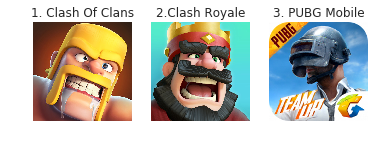

In [30]:
import urllib.request
from PIL import Image

plt.figure(figsize=(6,3))
plt.subplot(131)
image = Image.open(urllib.request.urlopen(review.iloc[0,-1]))
plt.title('1. Clash Of Clans')
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open(urllib.request.urlopen(review.iloc[1,-1]))
plt.title('2.Clash Royale')
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open(urllib.request.urlopen(review.iloc[2,-1]))
plt.title('3. PUBG Mobile')
plt.imshow(image)
plt.axis('off')

plt.show()

## ## <font color='chocolate'>Most Expensive Game</font>

In [31]:
data.dropna(inplace = True)
price = data.sort_values(by='Price', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'Icon URL']].head(10)
price.iloc[:, 0:-1]

,Name,Price,Average User Rating,Size
2634,Finabase: realtime stocks,139.99,4.5,1.333432e+08
3153,Tarot - Single and Multiplayer,8.99,4.5,1.180641e+08
673,Ticket to Ride,6.99,4.0,6.686689e+08
5383,Carrier Battles 4 Guadalcanal,6.99,4.5,8.587469e+07
11785,Realpolitiks Mobile,5.99,3.5,2.045932e+08
401,Catan Classic HD,4.99,4.0,8.129567e+08
431,"""Sally's Spa HD""",4.99,4.0,2.522470e+08
6522,Deus Ex GO,4.99,4.5,3.017359e+08
2816,Hitman GO,4.99,4.5,1.106129e+09
9560,Siralim 2 (Monster Taming RPG),4.99,4.5,1.549609e+08


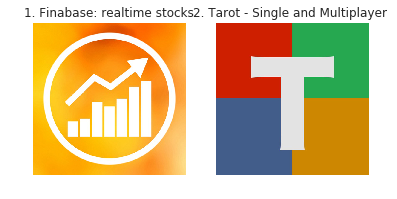

In [32]:
import urllib.request
from PIL import Image

plt.figure(figsize=(6,3))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(price.iloc[0,-1]))
plt.title('1. Finabase: realtime stocks')
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(price.iloc[1,-1]))
plt.title('2. Tarot - Single and Multiplayer ')
plt.imshow(image)
plt.axis('off')


plt.show()

## ## <font color='chocolate'>Best Overall Game in App Store</font>


In [33]:
best = data.sort_values(by=['Average User Rating', 'User Rating Count'], ascending=False)[['Name', 'Average User Rating', 'User Rating Count', 'Size', 
                                                                                         'Price', 'Developer',  'Icon URL',]].head(10)
best.iloc[:, 0:-1]

,Name,Average User Rating,User Rating Count,Size,Price,Developer
12473,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,245957632.0,0.00,Lion Studios
6089,"Egg, Inc.",5.0,174591.0,74891264.0,0.00,"Auxbrain, Inc."
14155,AFK Arena,5.0,156766.0,225711104.0,0.00,Lilith Games
8388,South Park: Phone Destroyer\u2122,5.0,156044.0,130186240.0,0.00,Ubisoft
13261,From Zero to Hero: Cityman,5.0,146729.0,296638464.0,0.00,Heatherglade Ltd
15266,Sushi Bar Idle,5.0,123606.0,257325056.0,0.00,Green Panda Games
10418,Fire Emblem Heroes,5.0,120283.0,175634432.0,0.00,"Nintendo Co., Ltd."
1649,Bloons TD 5,5.0,97776.0,133326848.0,2.99,Ninja Kiwi
16434,Idle Roller Coaster,5.0,88855.0,234342400.0,0.00,Green Panda Games
11722,Mafia City: War of Underworld,5.0,88542.0,180564992.0,0.00,YOTTA GAMES LIMITED


**Cash, Inc. Fame & Fortune Game Develop by Lion Studios**

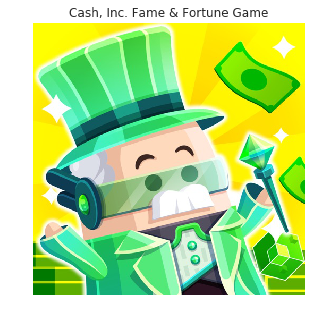

**--Cash, Inc. Fame & Fortune Game turns out to be best overall game with 5.0 rating and 374772 reviews -- There are also a lot of other Games with 5.0 rating and healthy number of reviews**

In [34]:
bold('**Cash, Inc. Fame & Fortune Game Develop by Lion Studios**')
plt.figure(figsize=(5,5))
image = Image.open(urllib.request.urlopen(best.iloc[0, -1]))
plt.axis('off')
plt.title('Cash, Inc. Fame & Fortune Game')
plt.imshow(image)
plt.show()
bold('**--Cash, Inc. Fame & Fortune Game turns out to be best overall game with 5.0 rating and 374772 reviews -- There are also a lot of other Games with 5.0 rating and healthy number of reviews**')

# <font color='steelblue'>Give me your feedback and if you find my kernel helpful please UPVOTE will be appreciated</font>

## --Thank You for Reading